# Lecture 6

In [1]:
%run set_env.py
%matplotlib inline

Check versions:
  numpy version     :'1.24.3'
  matplotlib version:'3.8.2'


## Fancy Indexing

* Previously we discussed <font color="green"><b>slicing</b></font> (which generates a <font color="green"><b>view</b></font>/reference).
* Sometimes we need a <font color="blue"><b>more general approach</b></font> than slicing<br>
  i.e. to obtain <font color="blue"><b>"irregular"</b></font> portions of an array => <font color="green"><b>Fancy Indexing</b></font>
* Fancy Indexing: generates a <font color="green"><b>copy</b></font> because it can in general
  not be expressed as a slice (using offsets, strides,..)
* In praxi, there are <font color="green"><b>2 approaches</b></font> to fancy indexing:
  * indexing by booleans (i.e. masks/masked arrays)
  * indexing by position

 

### Indexing by Booleans:

* requires a <font color="green"><b>boolean ndarray/mask</b></font>
* the boolean ndarray MUST have the <font color="green"><b>same shape</b></font><br> 
  as the ndarray to which it will be applied

#### Example:

In [2]:
from math import pi
np.set_printoptions(precision=5)

def myufunc(x):
    """
    My own non-linear ufunc:
       sin(x) + sin(2x) + cos(x) + cos(2x) + ln(x+1)
    """
    return np.sin(x) + np.sin(2*x) + \
           np.cos(x) + np.cos(2*x) + \
           np.log(x+1)

In [3]:
x = np.linspace(0,2.*pi,60)
y = myufunc(x)
print(f"  x.shape:{x.shape}")
print(f"  x:\n{x}\n")
print(f"  y.shape:{y.shape}")
print(f"  y:\n{y}\n")

  x.shape:(60,)
  x:
[0.      0.10649 0.21299 0.31948 0.42598 0.53247 0.63897 0.74546 0.85196
 0.95845 1.06495 1.17144 1.27794 1.38443 1.49093 1.59742 1.70391 1.81041
 1.9169  2.0234  2.12989 2.23639 2.34288 2.44938 2.55587 2.66237 2.76886
 2.87536 2.98185 3.08835 3.19484 3.30133 3.40783 3.51432 3.62082 3.72731
 3.83381 3.9403  4.0468  4.15329 4.25979 4.36628 4.47278 4.57927 4.68577
 4.79226 4.89875 5.00525 5.11174 5.21824 5.32473 5.43123 5.53772 5.64422
 5.75071 5.85721 5.9637  6.0702  6.17669 6.28319]

  y.shape:(60,)
  y:
[ 2.       2.39061  2.70572  2.93979  3.08979  3.15542  3.13926  3.0467
  2.88575  2.66671  2.40173  2.10435  1.78887  1.46976  1.16105  0.87574
  0.62526  0.41899  0.26391  0.16431  0.12169  0.13473  0.19939  0.30921
  0.4556   0.62833  0.81606  1.00686  1.18886  1.35082  1.48268  1.57607
  1.62473  1.62484  1.57522  1.47738  1.33553  1.15636  0.94878  0.72349
  0.4925   0.26861  0.06477 -0.10649 -0.23366 -0.30684 -0.31815 -0.26221
 -0.13636  0.05912  0.32101  0.6

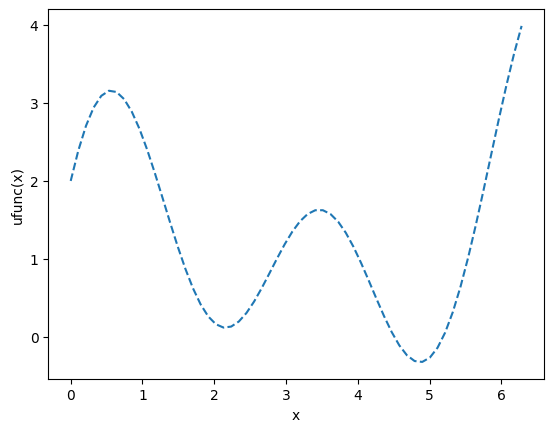

In [4]:
# Plot (ALL POINTS)
plt.xlabel("x")
plt.ylabel("ufunc(x)")
plt.plot(x,y,'--');

##### Apply restrictions/selection using a mask:

In [5]:
# Apply mask to the signal
mask = (y>1.) & (y<3.)   # DO NOT FORGET the Round Brackets => ERROR!
print(f"  mask.shape:{mask.shape}")
print(f"  mask:\n{mask}\n")

  mask.shape:(60,)
  mask:
[ True  True  True  True False False False False  True  True  True  True
  True  True  True False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False  True  True  True  True  True False False False]



In [6]:
# Use fancy indexing to obtain a subset from x
w = x[mask]
print(f"  w.shape:{w.shape}")
print(f"  w:\n{w}\n")
print(f"  w.flags:\n{w.flags}")

  w.shape:(27,)
  w:
[0.      0.10649 0.21299 0.31948 0.85196 0.95845 1.06495 1.17144 1.27794
 1.38443 1.49093 2.87536 2.98185 3.08835 3.19484 3.30133 3.40783 3.51432
 3.62082 3.72731 3.83381 3.9403  5.53772 5.64422 5.75071 5.85721 5.9637 ]

  w.flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [7]:
# Get the signals of the subset 
z = y[mask]
print(f"  z.shape:{z.shape}")
print(f"  z:\n{z}\n")
print(f"  z.flags:\n{z.flags}")

  z.shape:(27,)
  z:
[2.      2.39061 2.70572 2.93979 2.88575 2.66671 2.40173 2.10435 1.78887
 1.46976 1.16105 1.00686 1.18886 1.35082 1.48268 1.57607 1.62473 1.62484
 1.57522 1.47738 1.33553 1.15636 1.01703 1.43136 1.87332 2.32866 2.78238]

  z.flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



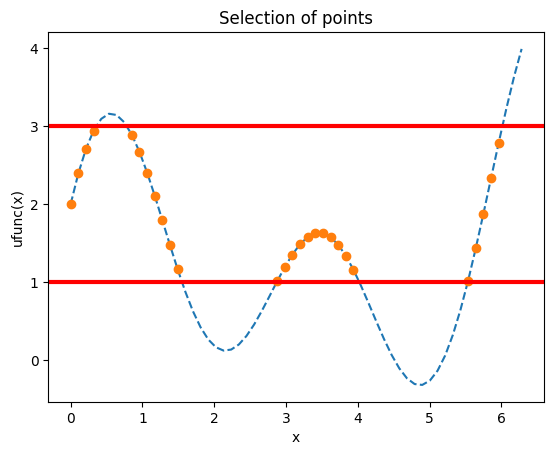

In [8]:
# Final plot
plt.xlabel("x")
plt.ylabel("ufunc(x)")
plt.title("Selection of points")
plt.plot(x,y,'--',w,z,'o');
plt.axhline(y=3,linewidth=3,color='r');
plt.axhline(y=1,linewidth=3,color='r');

#### Some handy functions:

* np.nonzero(a): returns the **INDICES** of the elements that are NON zero.<br>
  In case of boolean values:
  * False := 0
  * True is non-zero  
* np.where(condition,[x,y]): 
  * if <font color="green"><b>only the condition</b></font> is given, returns the **indices** of the non-zero el. (<font color="green"><b>idem as np.nonzero()</b></font>).
  * else if <font color="green"><b>x and y are present</b></font>, returns elements from 
    <font color="green"><b>x (TRUE) or y (FALSE)</b></font>.      
    
* <font color="green"><b>NOTE</b></font>:
  * np.flatnonzero(a): return the INDICES that are NON zero in the <font color="green"><b>FLATTENED</b></font> version of the input array (a)
  * np.unravel_index(indices,dims): convert a FLAT index or array of FLAT indices into a TUPLE of coordinate arrays.

In [9]:
# 1D example:
a = np.array([-10.,-20.,3.,0.,60,-12.])
print(f"  a:\n{a}\n")
a_ind = a.nonzero()
print(f"  a.non_zero():\n{a_ind}\n")


# Just the condition => identical as np.nonzero()
b = np.where(a>=3)
print(f"  b:\n{b}\n")

# Condition,x,y
c = np.where(a>=3,a, -np.ones_like(a))
print(f"  c:\n{c}\n")
d = np.where(a>=3,a, -1)
print(f"  d:\n{d}\n")

  a:
[-10. -20.   3.   0.  60. -12.]

  a.non_zero():
(array([0, 1, 2, 4, 5]),)

  b:
(array([2, 4]),)

  c:
[-1. -1.  3. -1. 60. -1.]

  d:
[-1. -1.  3. -1. 60. -1.]



In [10]:
# 2D example:
b = np.random.random((5,6))
b[b<0.8] = 0.
print(f"  b:\n{b}\n")

b_ind1 = b.nonzero()
print(f"  b_ind1 (NON-FLATTENED):\n{b_ind1}\n")
print(f"  type(b_ind1):{type(b_ind1)}")
for item in b_ind1:
    print(f"    arr:{item}")   
    
# Get the NON-ZERO el.
c = b[b_ind1]
print(f"  c:\n{c}\n")

b_ind2 = np.flatnonzero(b)
print(f"  b_ind2 (FLATTENED):\n{b_ind2}\n")

b_ind3 = np.unravel_index(b_ind2,b.shape)
print(f"  b_ind3 (UNRAVELLED INDEX):\n{b_ind3}\n")

  b:
[[0.      0.      0.      0.90335 0.93503 0.     ]
 [0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.     ]
 [0.      0.      0.8007  0.      0.98056 0.     ]
 [0.      0.      0.      0.      0.      0.     ]]

  b_ind1 (NON-FLATTENED):
(array([0, 0, 3, 3]), array([3, 4, 2, 4]))

  type(b_ind1):<class 'tuple'>
    arr:[0 0 3 3]
    arr:[3 4 2 4]
  c:
[0.90335 0.93503 0.8007  0.98056]

  b_ind2 (FLATTENED):
[ 3  4 20 22]

  b_ind3 (UNRAVELLED INDEX):
(array([0, 0, 3, 3]), array([3, 4, 2, 4]))



### Indexing by position:

* Instead of a boolean mask, we can also can use the <font color="green"><b>indices</b></font> 
  to retrieve the elements.

#### Example 1:

In [11]:
x = np.arange(20,100,10)
print("  x:{0}".format(x))
ind1 = [2,5,3]         # Python List
ind2 = np.array(ind1)  # Numpy array
print(f"    -> slice 1:{x[ind1]}")
print(f"    -> slice 2:{x[ind2]}")

  x:[20 30 40 50 60 70 80 90]
    -> slice 1:[40 70 50]
    -> slice 2:[40 70 50]


##### Example 2:


In [ ]:
x = np.arange(48).reshape((6,8))
print(f"  x:\n{x}\n")

In [ ]:
# Our goal is to extract the following numbers:
# [1,10,11,20,37,47]
y = x[ [0,1,1,2,4,5],[1,2,3,4,5,7]] 
print(f"  y (slice):\n    {y}\n")
print(f"  y.flags -> view/copy?:\n{y.flags}\n")

In [ ]:
# Our goal is to extract [[9,13],[33,37]]
y = x[[1,1,4,4],[1,5,1,5]]          # as 1D vector
print(f"  sliced version:\n{y}\n")
z = x[[[1,1],[4,4]],[[1,5],[1,5]]]  # as 2D vector
print(f"  sliced version:\n{z}\n") 

In [ ]:
# Combination of regular indexing & fancy indexing
w = x[1::3,[1,5]]
print(f"  sliced version:\n{w}\n")

### Exercises:

* Generate an array of random points in the plane $p_i(x_i,y_i)$ (sampled from the uniform distribution),<br> where:<br>
  * $i=1,\ldots,N$ (e.g. $N$=15) <br> 
  * which <font color="green"><b>ALL</b></font> lie in a square that has the following characteristics:
    * centered at (0,0)
    * and with vertices: (-1,-1),(-1,1),(1,-1),(1,1)
  * find the coordinates of the points that lie <font color="green"><b>OUTSIDE</b></font> the unit-circle
  * set the coordinates of the point that lie <font color="green"><b>WITHIN</b></font> the unit-circle to (0.,0.)
  
* Generate a 6x8 array of random numbers $\in$ [0,1[.<br>
  * For each row find the number closest to 0.5<br>
    (Use fancy indexing to extract the numbers)
  * <b>HINT</b>: np.abs, np.argmin  

### Solutions:

In [ ]:
# %load ../solutions/ex6.py